<a href="https://colab.research.google.com/github/JessemanGray/Syn-Aesthetics/blob/main/Syn_Aesthetics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import packages
import os
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split



In [2]:
# Turn url path into DataFrame, show first five rows
url1 = ('https://raw.githubusercontent.com/JessemanGray/Syn-Aesthetics/main/ChillsDB%201.0.1%20-%20Film%20Stimuli%20(1).csv')
df_Film = pd.read_csv(url1)

# Turn file path into DataFrame, show first five rows
url2 = ('https://raw.githubusercontent.com/JessemanGray/Syn-Aesthetics/main/ChillsDB%201.0.1%20-%20Speech%20Stimuli%20(2).csv')
df_Speech = pd.read_csv(url2)

# Turn file path into DataFrame, show first five rows
url3 = ('https://raw.githubusercontent.com/JessemanGray/Syn-Aesthetics/main/ChillsDB%201.0.1%20-%20Music%20Stimuli.csv')
df_Music = pd.read_csv(url3)


In [3]:
df_Film['source'] = 'df_Film'
df_Speech['source'] = 'df_Speech'
df_Music['source'] = 'df_Music'

df = pd.concat([df_Film, df_Speech, df_Music])

In [4]:
# Fill missing values with the mean of the column
df = df.fillna(df.mean())

# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum()

# Display columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]
print(columns_with_missing_values)

# Chenck types before dropping
df['Timings'].dtypes


Ethnicity        1
Timings        179
Unnamed: 27    528
Unnamed: 28    528
dtype: int64


<ipython-input-4-47b1b45d6538>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


dtype('O')

In [5]:
# Drop duplicate or unnecessary columns
df = df.drop(columns=['chills Binary.1', 'Unnamed: 32', 'Unnamed: 34', 'Unnamed: 28', 'Unnamed: 27', 'Timings'])


# Convert data types
df['chills Binary'] = df['chills Binary'].astype(bool)

# Check for correlation between 'Direction' and 'Tan inverse.1'
print(df[['Direction', 'Tan inverse.1']].corr())

               Tan inverse.1
Tan inverse.1            1.0


<ipython-input-5-e36ad79d19f0>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df[['Direction', 'Tan inverse.1']].corr())


In [6]:
def score(val):
    if val >= 1:
        return 3
    elif val >= 0.5:
        return 2
    elif val >= 0:
        return 1
    else:
        return 0

def classify_chill(row):
    emotion_score = score(row['Emotion drift'])
    calm_score = score(row['Calm Diff'])
    pleasure_score = score(row['Pleasure Diff'])

    # Sum the scores and normalize to a 0-10 scale
    total_score = emotion_score + calm_score + pleasure_score
    chill_rating = (total_score / 9) * 10  # 9 is the maximum total_score

    return str(round(chill_rating, 1))  # Round to 1 decimal place

df['Chill Rating'] = df.apply(classify_chill, axis=1)

In [7]:
df.head(100)

Video ID  Age  Gender Ethnicity  chills Binary  Chills #  \
0   FtCslvCjZEY   56  female     White           True         3   
1   FtCslvCjZEY   25    male     White           True         1   
2   FtCslvCjZEY   27    male     White           True         6   
3   FtCslvCjZEY   39    male     White           True         7   
4   FtCslvCjZEY   30    male     White           True         2   
..          ...  ...     ...       ...            ...       ...   
95  nCqDdsZY7RA   22  female     White           True         8   
96  gNtJ4HdMavo   23  female     White          False         0   
97  gNtJ4HdMavo   25  female     White           True         5   
98  gNtJ4HdMavo   57  female     White          False         0   
99  nCqDdsZY7RA   46    male     White          False         0   

    Chill Intensity  Daily Chills  NIO_Openess Prior exposure  ...  Diff NEO  \
0                 1             3            3             No  ...         4   
1                 1             1            3            Yes  ...         4   
2                 0             1            3            Yes  ...         3   
3                 3             2            3            Yes  ...         4   
4                 2             1            3            Yes  ...        -1   
..              ...           ...          ...            ...  ...       ...   
95                1             1            3             No  ...         3   
96                0             1            1             No  ...         6   
97                1             2            3             No  ...         5   
98                0             3            2             No  ...        12   
99                0             1            2             No  ...         7   

    Total NEO  Emotion drift     Direction  Tan inverse  Calm Diff  \
0          18       0.707107  -1.557407725    -0.785398        0.5   
1          18       0.707107   1.557407725     0.785398       -0.5   
2          17       1.118034  -2.185039863     1.107149       -0.5   
3          20       0.500000       #DIV/0!    -1.570000        0.0   
4          15       2.236068   2.185039863    -1.107149       -1.0   
..        ...            ...           ...          ...        ...   
95         13       4.716991   0.721484441     0.558599       -4.0   
96         12       1.581139  0.3462535495     0.321751       -1.5   
97         21       2.236068   2.185039863    -1.107149        1.0   
98         16       2.000000             0     0.000000       -2.0   
99         23       2.236068  0.5463024898     0.463648       -2.0   

    Pleasure Diff  Tan inverse.1   source  Chill Rating  
0            -0.5      -0.785398  df_Film           4.4  
1            -0.5       0.785398  df_Film           2.2  
2            -1.0       1.107149  df_Film           3.3  
3            -0.5      -1.570000  df_Film           3.3  
4             2.0      -1.107149  df_Film           6.7  
..            ...            ...      ...           ...  
95           -2.5       0.558599  df_Film           3.3  
96           -0.5       0.321751  df_Film           3.3  
97           -2.0      -1.107149  df_Film           6.7  
98            0.0       0.000000  df_Film           4.4  
99           -1.0       0.463648  df_Film           3.3  

[100 rows x 31 columns]

In [8]:
"""
This function calls the sentiment driven columns to create a new column narrowing sentiment analysis to a range of 'beneficial' and 'dischordant'
"""
def chill_effect(row):
    if row['Emotion drift'] > 0 and row['Calm Diff'] > 0 and row['Pleasure Diff'] > 0:
        return 'beneficial'
    elif row['Emotion drift'] > 0 or row['Calm Diff'] > 0 or row['Pleasure Diff'] > 0:
        return 'medium beneficial'
    elif row['Emotion drift'] == 0 and row['Calm Diff'] == 0 and row['Pleasure Diff'] == 0:
        return 'none'
    elif row['Emotion drift'] < 0 or row['Calm Diff'] < 0 or row['Pleasure Diff'] < 0:
        return 'medium dischordant'
    else:
        return 'dischordant'

# Apply the function to each row in your DataFrame
df['Chill Effect'] = df.apply(chill_effect, axis=1)

In [9]:
df.head()

Video ID  Age  Gender Ethnicity  chills Binary  Chills #  \
0  FtCslvCjZEY   56  female     White           True         3   
1  FtCslvCjZEY   25    male     White           True         1   
2  FtCslvCjZEY   27    male     White           True         6   
3  FtCslvCjZEY   39    male     White           True         7   
4  FtCslvCjZEY   30    male     White           True         2   

   Chill Intensity  Daily Chills  NIO_Openess Prior exposure  ...  Total NEO  \
0                1             3            3             No  ...         18   
1                1             1            3            Yes  ...         18   
2                0             1            3            Yes  ...         17   
3                3             2            3            Yes  ...         20   
4                2             1            3            Yes  ...         15   

   Emotion drift     Direction  Tan inverse  Calm Diff  Pleasure Diff  \
0       0.707107  -1.557407725    -0.785398        0.5           -0.5   
1       0.707107   1.557407725     0.785398       -0.5           -0.5   
2       1.118034  -2.185039863     1.107149       -0.5           -1.0   
3       0.500000       #DIV/0!    -1.570000        0.0           -0.5   
4       2.236068   2.185039863    -1.107149       -1.0            2.0   

   Tan inverse.1   source  Chill Rating       Chill Effect  
0      -0.785398  df_Film           4.4  medium beneficial  
1       0.785398  df_Film           2.2  medium beneficial  
2       1.107149  df_Film           3.3  medium beneficial  
3      -1.570000  df_Film           3.3  medium beneficial  
4      -1.107149  df_Film           6.7  medium beneficial  

[5 rows x 32 columns]

In [ ]:
# Plot sentiment analysis using 'Chill Rating'
plt.hist(df['Chill Rating'], bins=20, range=(0, 10), color='limegreen')
plt.title('Chill Rating Distribution')
plt.xlabel('Chill Rating')
plt.ylabel('Count')
plt.style.use('dark_background')
plt.show()

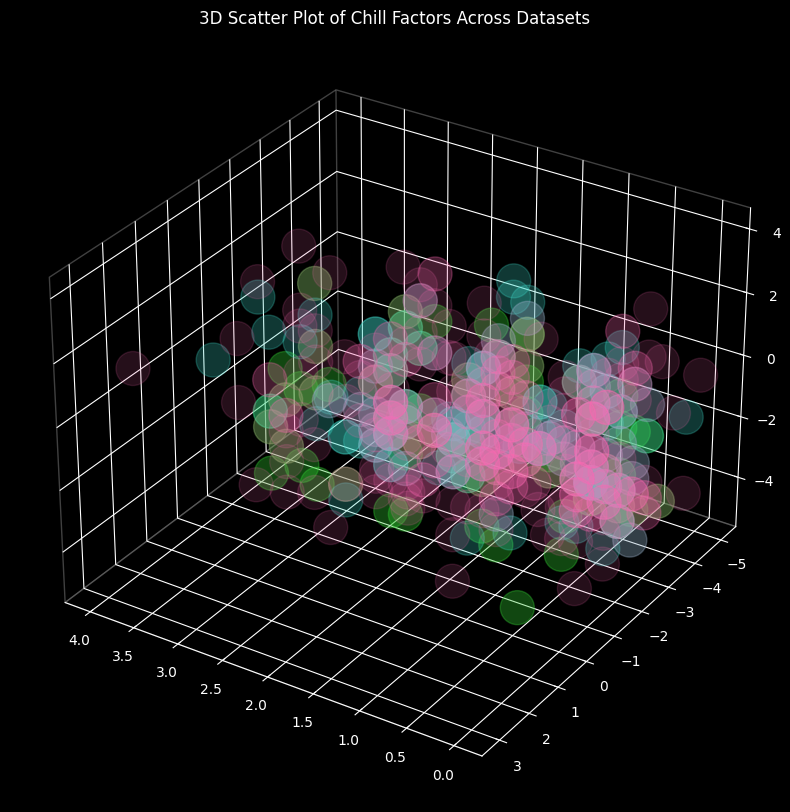

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Set grid color to gray
ax.xaxis.pane.set_edgecolor('gray')
ax.yaxis.pane.set_edgecolor('gray')
ax.zaxis.pane.set_edgecolor('gray')

# Set grid background color to dark
ax.xaxis.pane.set_facecolor('black')
ax.yaxis.pane.set_facecolor('black')
ax.zaxis.pane.set_facecolor('black')

ax.scatter(df_Film['Chill Intensity'], df_Film['Pleasure Diff'], df_Film['Calm Diff'], c='hotpink', s=600, alpha=0.15)
ax.scatter(df_Music['Chill Intensity'], df_Music['Pleasure Diff'], df_Music['Calm Diff'], c='turquoise', s=600, alpha=0.25)
ax.scatter(df_Speech['Chill Intensity'], df_Speech['Pleasure Diff'], df_Speech['Calm Diff'], c='limegreen', s=600, alpha=0.35)

ax.view_init(30, 123)
plt.title('3D Scatter Plot of Chill Factors Across Datasets')
plt.show()

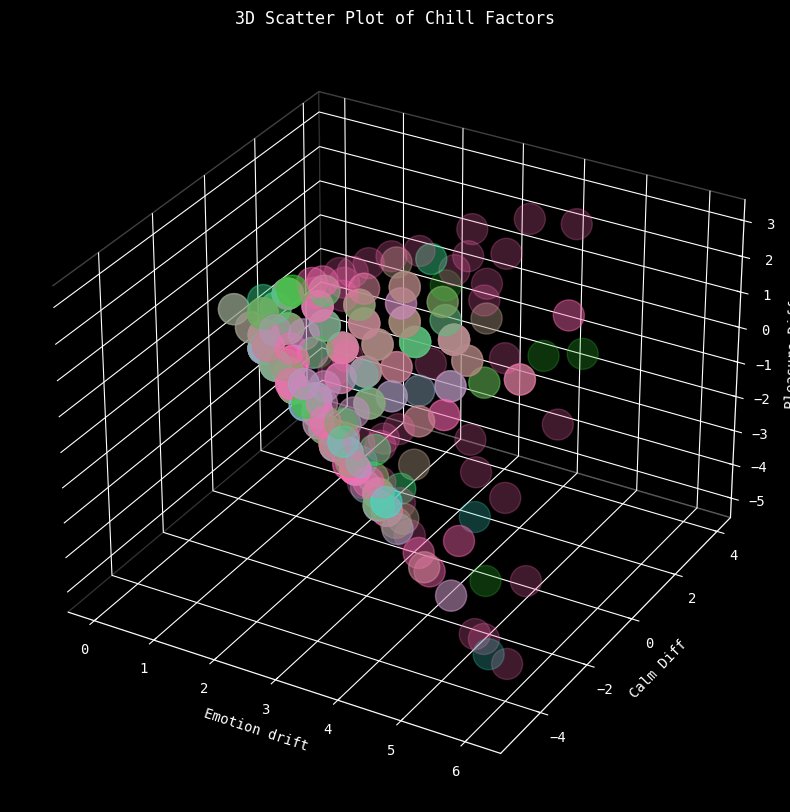

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'monospace'  # Set font to 'Courier New'
matplotlib.rcParams['font.size'] = 10  # Reduce font size by half
plt.style.use('dark_background')  # Set the style to 'dark_background'

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

colors = {'df_Film': 'hotpink', 'df_Speech': 'turquoise', 'df_Music': 'limegreen'}

ax.scatter(df['Emotion drift'], df['Calm Diff'], df['Pleasure Diff'], c=df['source'].apply(lambda x: colors[x]), s=500, alpha=.25)

# Set grid color to gray
ax.xaxis.pane.set_edgecolor('gray')
ax.yaxis.pane.set_edgecolor('gray')
ax.zaxis.pane.set_edgecolor('gray')

# Set grid background color to dark
ax.xaxis.pane.set_facecolor('black')
ax.yaxis.pane.set_facecolor('black')
ax.zaxis.pane.set_facecolor('black')

ax.set_xlabel('Emotion drift')
ax.set_ylabel('Calm Diff')
ax.set_zlabel('Pleasure Diff')
plt.title('3D Scatter Plot of Chill Factors')
plt.show()

In [ ]:
colors = {'df_Film': 'hotpink', 'df_Speech': 'limegreen', 'df_Music': 'turquoise'}

In [ ]:
c=df['source'].apply(lambda x: colors[x])

In [ ]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')



def update(num):
    ax.clear()
    ax.grid(False)
    ax.xaxis.pane.set_edgecolor('black')
    ax.yaxis.pane.set_edgecolor('black')
    ax.zaxis.pane.set_edgecolor('black')
    ax.xaxis._axinfo["grid"]['linewidth'] = 0
    ax.yaxis._axinfo["grid"]['linewidth'] = 0
    ax.zaxis._axinfo["grid"]['linewidth'] = 0
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.xaxis.line.set_color("black")
    ax.yaxis.line.set_color("black")
    ax.zaxis.line.set_color("black")

    sample_df = df.sample(100)
    ax.scatter(sample_df['Emotion drift'], sample_df['Calm Diff'], sample_df['Pleasure Diff'],
               c=sample_df['source'].apply(lambda x: colors[x]), s=20000, alpha=.15)
    ax.view_init(elev=0., azim=num)

ani = FuncAnimation(fig, update, frames=range(0,200,10), interval=300)  # Slow down the animation

# Adjust subplot parameters to center the graph
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)

HTML(ani.to_jshtml())

In [ ]:
import plotly.graph_objects as go


trace1 = go.Scatter3d(
    x=df_Film.index,
    y=df_Film['Pleasure Diff'],
    z=[1]*len(df_Film),  # This creates a flat scatter plot
    mode='markers',
    marker=dict(
        size=10,
        opacity=0.25,
        color='hotpink'  # color for df1
    ),
    name='df_Film'
)

trace2 = go.Scatter3d(
    x=df_Speech.index,
    y=df_Speech['Pleasure Diff'],
    z=[2]*len(df_Speech),  # This creates a flat scatter plot
    mode='markers',
    marker=dict(
        size=10,
        opacity=0.25,
        color='turquoise'  # color for df2
    ),
    name='df_Speech'
)

trace3 = go.Scatter3d(
    x=df_Music.index,
    y=df_Music['Pleasure Diff'],
    z=[3]*len(df_Music),  # This creates a flat scatter plot
    mode='markers',
    marker=dict(
        size=10,
        opacity=0.25,
        color='orange'  # color for df3
    ),
    name='df_Music'
)

data = [trace1, trace2, trace3]

# Set the background color and grid color
layout = go.Layout(scene=dict(
    xaxis=dict(backgroundcolor="black", gridcolor="gray", showbackground=True, title='Index'),
    yaxis=dict(backgroundcolor="black", gridcolor="gray", showbackground=True, title='Pleasure Difference'),
    zaxis=dict(backgroundcolor="black", gridcolor="gray", showbackground=True, title='Dataset')),
    paper_bgcolor='black'
)

fig = go.Figure(data=data, layout=layout)

fig.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Convert 'source' to category codes
df['source_cat'] = pd.Categorical(df['source']).codes

# Create a 3D scatter plot
fig = go.Figure(data=go.Scatter3d(
    x=df['Emotion drift'],
    y=df['Calm Diff'],
    z=df['Pleasure Diff'],
    mode='markers',
    marker=dict(
        size=10,  # Sets marker size
        opacity=0.25,  # Sets marker opacity
        color=df['source_cat'],  # Set color to the 'source_cat' column
        colorscale='Viridis',  # Choose a colorscale
        colorbar=dict(title="Datasets")  # Add a color bar with title 'Source'
    )
))

# Set the background color and grid color
fig.update_layout(scene=dict(
    xaxis=dict(backgroundcolor="black", gridcolor="gray", showbackground=True, title='Emotion drift'),
    yaxis=dict(backgroundcolor="black", gridcolor="gray", showbackground=True, title='Calm Diff'),
    zaxis=dict(backgroundcolor="black", gridcolor="gray", showbackground=True, title='Pleasure Diff')),
    paper_bgcolor='black'
)

fig.show()

In [ ]:
import plotly.graph_objects as go


trace1 = go.Scatter3d(
    x=df_Film.index,
    y=df_Film['Chill Intensity'],
    z=[1]*len(df_Film),  # This creates a flat scatter plot
    mode='markers',
    marker=dict(
        size=10,
        opacity=0.25,
        color='orange'  # color for df1
    ),
    name='df_Film'
)

trace2 = go.Scatter3d(
    x=df_Speech.index,
    y=df_Speech['Chill Intensity'],
    z=[2]*len(df_Speech),  # This creates a flat scatter plot
    mode='markers',
    marker=dict(
        size=10,
        opacity=0.25,
        color='purple'  # color for df2
    ),
    name='df_Speech'
)

trace3 = go.Scatter3d(
    x=df_Music.index,
    y=df_Music['Chill Intensity'],
    z=[3]*len(df_Music),  # This creates a flat scatter plot
    mode='markers',
    marker=dict(
        size=10,
        opacity=0.25,
        color='white'  # color for df3
    ),
    name='df_Music'
)

data = [trace1, trace2, trace3]

# Set the background color and grid color
layout = go.Layout(scene=dict(
    xaxis=dict(backgroundcolor="black", gridcolor="gray", showbackground=True, title='Index'),
    yaxis=dict(backgroundcolor="black", gridcolor="gray", showbackground=True, title='Chill Intensity'),
    zaxis=dict(backgroundcolor="black", gridcolor="gray", showbackground=True, title='Dataset')),
    paper_bgcolor='black'
)

fig = go.Figure(data=data, layout=layout)

fig.show()

In [ ]:
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show, output_notebook
from bokeh.palettes import Category10
from bokeh.transform import factor_cmap

from bokeh.plotting import curdoc, figure, show
from bokeh.models import HoverTool
from bokeh.io import output_notebook
from bokeh.palettes import Category10
from bokeh.transform import factor_cmap

# Assuming df is your DataFrame, and 'predictions_rescaled' is a column with your predictions
df['colors'] = [Category10[10][i % 10] for i in range(len(df))]

# Create a new plot with the HoverTool
hover = HoverTool(tooltips=None, mode="vline")
p = figure(tools=[hover, 'wheel_zoom', 'pan'], title="Pleasure Diff and Chill Intensity")

# Add a circle renderer for actual values
p.circle('Pleasure Diff', 'Chill Intensity', radius=1, fill_color='colors', fill_alpha=0.6,
         line_color=None, source=ColumnDataSource(df))

# Add a circle renderer for predictions
p.circle('Pleasure Diff', 'predictions_rescaled', radius=1, fill_color='hotpink', fill_alpha=0.6,
         line_color=None, source=ColumnDataSource(df))

curdoc().theme = 'dark_minimal'
output_notebook()
show(p)

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : y='predictions_rescaled' [no close matches] {renderer: GlyphRenderer(id='p1552', ...)}


In [ ]:
# Assuming Pleasure Diff is binary where 1 represents good chills and 0 represents bad chills
good_chills = df[df['Pleasure Diff'] >= 0.15]
bad_chills = df[df['Pleasure Diff']  < 0.15]

print("Good Chills - Mean Intensity: ", good_chills['Chill Intensity'].mean().round(4))
print("Bad Chills - Mean Intensity: ", bad_chills['Chill Intensity'].mean().round(4))

Good Chills - Mean Intensity:  1.4444
Bad Chills - Mean Intensity:  1.0395


In [ ]:
# Chill #
print("Good Chills - Mean #: ", good_chills['Chills #'].mean())
print("Bad Chills - Mean #: ", bad_chills['Chills #'].mean())

Good Chills - Mean #:  3.25
Bad Chills - Mean #:  2.405701754385965


In [ ]:
# Calm Diff
print("Good Chills - Mean Intensity: ", good_chills['Calm Diff'].mean().round(4))
print("Bad Chills - Mean Intensity: ", bad_chills['Calm Diff'].mean().round(4))

Good Chills - Mean Intensity:  0.3056
Bad Chills - Mean Intensity:  -0.3432


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select relevant columns
df_selected = df[['Emotion drift', 'Calm Diff', 'Pleasure Diff', 'Chill Rating', 'Chills #']]

# Fill any missing values
df_selected.fillna(method='ffill', inplace=True)

# Normalize the data to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df_selected)

# Convert the DataFrame to a 3D array for LSTM
# The shape should be (number of samples, 1, number of features)
df_reshaped = np.reshape(df_scaled, (df_scaled.shape[0], 1, df_scaled.shape[1]))

<ipython-input-22-eef44a2ec349>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.head()

Video ID  Age  Gender Ethnicity  chills Binary  Chills #  \
0  FtCslvCjZEY   56  female     White           True         3   
1  FtCslvCjZEY   25    male     White           True         1   
2  FtCslvCjZEY   27    male     White           True         6   
3  FtCslvCjZEY   39    male     White           True         7   
4  FtCslvCjZEY   30    male     White           True         2   

   Chill Intensity  Daily Chills  NIO_Openess Prior exposure  ...  \
0                1             3            3             No  ...   
1                1             1            3            Yes  ...   
2                0             1            3            Yes  ...   
3                3             2            3            Yes  ...   
4                2             1            3            Yes  ...   

   Emotion drift     Direction  Tan inverse  Calm Diff  Pleasure Diff  \
0       0.707107  -1.557407725    -0.785398        0.5           -0.5   
1       0.707107   1.557407725     0.785398       -0.5           -0.5   
2       1.118034  -2.185039863     1.107149       -0.5           -1.0   
3       0.500000       #DIV/0!    -1.570000        0.0           -0.5   
4       2.236068   2.185039863    -1.107149       -1.0            2.0   

   Tan inverse.1   source  Chill Rating       Chill Effect  source_cat  
0      -0.785398  df_Film           4.4  medium beneficial           0  
1       0.785398  df_Film           2.2  medium beneficial           0  
2       1.107149  df_Film           3.3  medium beneficial           0  
3      -1.570000  df_Film           3.3  medium beneficial           0  
4      -1.107149  df_Film           6.7  medium beneficial           0  

[5 rows x 33 columns]

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(df_reshaped.shape[1], df_reshaped.shape[2])))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

# Compile the model
model.compile(loss='mae', optimizer='adam', metrics='accuracy')

# Train the model
history = model.fit(df_reshaped, df['Pleasure Diff'], epochs=50, batch_size=72, validation_split=0.2, verbose=0, shuffle=False)

Plot created.


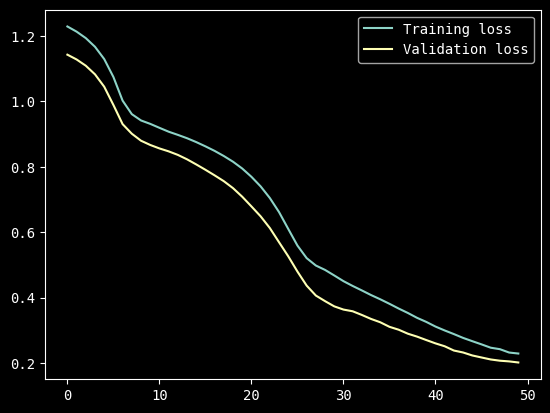

In [ ]:
import matplotlib.pyplot as plt

plt.figure()  # Create a new figure
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.plot()

print("Plot created.")

In [ ]:
plt.figure()  # Create a new figure
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler for the target variable
scaler_target = MinMaxScaler(feature_range=(0, 1))
df_target_scaled = scaler_target.fit_transform(df[['Pleasure Diff']])

# Train the model
history = model.fit(df_reshaped, df_target_scaled, epochs=50, batch_size=72, validation_split=0.2, verbose=0, shuffle=False)

# Make predictions
predictions = model.predict(df_reshaped)

# Invert scaling for the predictions
predictions_rescaled = scaler_target.inverse_transform(predictions)

# Plot the actual values vs the predictions
plt.plot(df['Pleasure Diff'].values, label='Actual values')
plt.plot(predictions_rescaled, label='Predictions',color='hotpink')
plt.title('Pleasure Difference')
plt.legend()
plt.show()


17/17 [==============================] - 1s 5ms/step


17/17 [==============================] - 0s 3ms/step


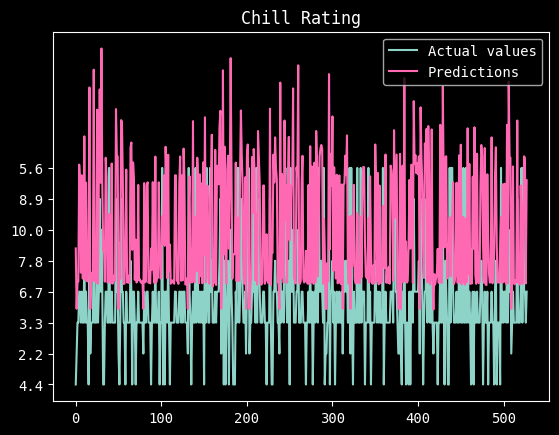

In [ ]:
# Create a MinMaxScaler for the target variable
scaler_target = MinMaxScaler(feature_range=(0, 1))
df_target_scaled = scaler_target.fit_transform(df[['Chill Rating']])

# Train the model
history = model.fit(df_reshaped, df_target_scaled, epochs=50, batch_size=72, validation_split=0.2, verbose=0, shuffle=False)

# Make predictions
predictions = model.predict(df_reshaped)

# Invert scaling for the predictions
predictions_rescaled = scaler_target.inverse_transform(predictions)

# Plot the actual values vs the predictions
plt.plot(df['Chill Rating'].values, label='Actual values')
plt.plot(predictions_rescaled, label='Predictions',color='hotpink')
plt.title('Chill Rating')
plt.legend()
plt.show()



In [ ]:
# Create a MinMaxScaler for the target variable
scaler_target = MinMaxScaler(feature_range=(0, 1))
df_target_scaled = scaler_target.fit_transform(df[['Calm Diff']])

# Train the model
history = model.fit(df_reshaped, df_target_scaled, epochs=50, batch_size=72, validation_split=0.2, verbose=0, shuffle=False)

# Make predictions
predictions = model.predict(df_reshaped)

# Invert scaling for the predictions
predictions_rescaled = scaler_target.inverse_transform(predictions)

# Plot the actual values vs the predictions
plt.plot(df['Calm Diff'].values, label='Actual values')
plt.plot(predictions_rescaled, label='Predictions', color='hotpink')
plt.title('Calm Difference')  # Add title
plt.legend()
plt.show()

17/17 [==============================] - 0s 3ms/step


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define the LSTM model
model_2 = Sequential()
model_2.add(LSTM(50, return_sequences=True, input_shape=(df_reshaped.shape[1], df_reshaped.shape[2])))
model_2.add(LSTM(50, return_sequences=True))
model_2.add(LSTM(50))
model_2.add(Dense(1))

# Compile the model
model_2.compile(loss='mae', optimizer='adam', metrics='accuracy')

# Train the model
history_2 = model_2.fit(df_reshaped, df['Calm Diff'], epochs=50, batch_size=72, validation_split=0.2, verbose=0, shuffle=False)

In [ ]:
plt.figure()  # Create a new figure
plt.plot(history_2.history['accuracy'], label='Training accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

In [ ]:
# Create a MinMaxScaler for the target variable
scaler_target = MinMaxScaler(feature_range=(0, 1))
df_target_scaled = scaler_target.fit_transform(df[['Emotion drift']])

# Train the model
history = model.fit(df_reshaped, df_target_scaled, epochs=50, batch_size=72, validation_split=0.2, verbose=0, shuffle=False)

# Make predictions
predictions = model.predict(df_reshaped)

# Invert scaling for the predictions
predictions_rescaled = scaler_target.inverse_transform(predictions)

# Plot the actual values vs the predictions
plt.plot(df['Emotion drift'].values, label='Actual values')
plt.plot(predictions_rescaled, label='Prediction', color='hotpink')
plt.title('Emotional Drift')  # Add title
plt.legend()
plt.show()

17/17 [==============================] - 0s 3ms/step


17/17 [==============================] - 0s 3ms/step


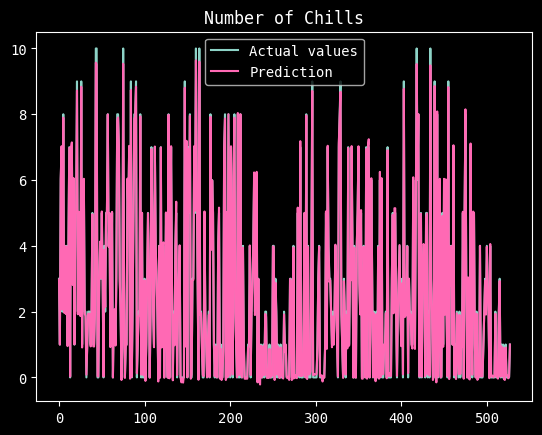

In [ ]:
# Create a MinMaxScaler for the target variable
scaler_target = MinMaxScaler(feature_range=(0, 1))
df_target_scaled = scaler_target.fit_transform(df[['Chills #']])

# Train the model
history = model.fit(df_reshaped, df_target_scaled, epochs=50, batch_size=72, validation_split=0.2, verbose=0, shuffle=False)

# Make predictions
predictions = model.predict(df_reshaped)

# Invert scaling for the predictions
predictions_rescaled = scaler_target.inverse_transform(predictions)

# Plot the actual values vs the predictions
plt.plot(df['Chills #'].values, label='Actual values')
plt.plot(predictions_rescaled, label='Prediction', color='hotpink')
plt.title('Number of Chills')
plt.legend()
plt.show()